In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data 
data=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [4]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Data Cleaning

##### Drop any column with few data points

In [5]:
# Drop column with missing data points
data.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)

In [6]:
empty_rows=data[data.isnull().any(axis=1)]
print(empty_rows['status'].unique())
print(empty_rows['txn_description'].unique())
print(data['txn_description'].unique())
empty_rows.head()

['posted']
['PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,2018-08-01,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,Michael,466.58,2018-08-01,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit
10,posted,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,Fernando,4348.50,2018-08-01,...,19,NaN,NaN,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit
11,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,Kristin,1203.75,2018-08-01,...,43,NaN,NaN,2018-08-01T06:00:00.000+0000,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit
13,posted,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,Isaiah,4438.16,2018-08-01,...,23,NaN,NaN,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit


#### Insight: 
Transcation that are posted are missing values in 'card_present_flag', 'merchant_id', and etc. because it's not applicable. As a result, we should leave it as it is for now.

##### Check for Outliers

Text(0.5, 1.0, 'Age Boxplot')

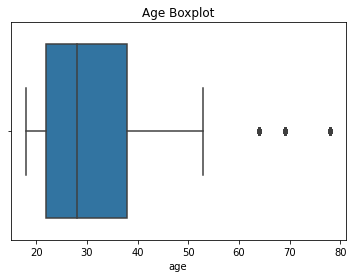

In [7]:
# Check for outliers in Age columns 
sns.boxplot(x=data['age'])
plt.title('Age Boxplot')

Text(0.5, 1.0, 'Transcation Amount Boxplot')

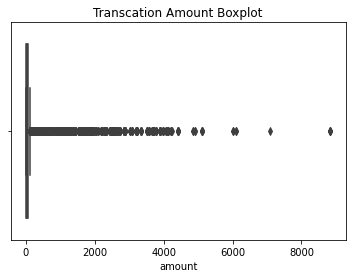

In [8]:
# Check for outliers in amount columns 
sns.boxplot(x=data['amount'])
plt.title('Transcation Amount Boxplot')

Text(0.5, 1.0, 'Balance Boxplot')

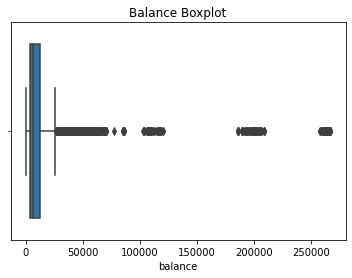

In [9]:
# Check for outliers in balance columns 
sns.boxplot(x=data['balance'])
plt.title('Balance Boxplot')

In [10]:
# Create columns for date
data['day']=data['date'].dt.day
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year
data['day_name']=data['date'].dt.day_name()
data

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,amount,transaction_id,country,customer_id,merchant_long_lat,movement,day,month,year,day_name
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,8,2018,Wednesday
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,8,2018,Wednesday
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,8,2018,Wednesday
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,8,2018,Wednesday
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,8,2018,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,...,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,31,10,2018,Wednesday
12039,authorized,1.0,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,...,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,31,10,2018,Wednesday
12040,authorized,1.0,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,...,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,31,10,2018,Wednesday
12041,authorized,1.0,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,...,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,31,10,2018,Wednesday


# Data Visuliazation

In [11]:
# Count of transcation type 
txn_count=pd.DataFrame(data['txn_description'].value_counts()).reset_index()
txn_count.columns=['txn_type','counts']
txn_count['percent']=txn_count.apply(lambda row: round((row['counts']/12043)*100,2),axis=1)
txn_count

,txn_type,counts,percent
0,SALES-POS,3934,32.67
1,POS,3783,31.41
2,PAYMENT,2600,21.59
3,PAY/SALARY,883,7.33
4,INTER BANK,742,6.16
5,PHONE BANK,101,0.84


Text(0, 0.5, 'Transcation Type')

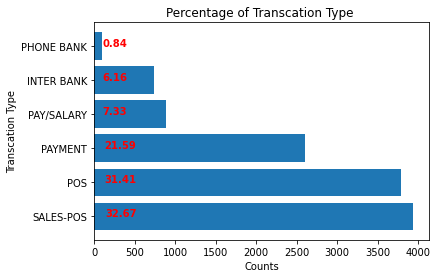

In [12]:
fig, ax = plt.subplots()   
plt.barh(txn_count['txn_type'],txn_count['counts'])
for i, v in enumerate(txn_count['percent']):
    ax.text(v + 100, i, str(v), color='red', fontweight='bold')
plt.title('Percentage of Transcation Type ')
plt.xlabel('Counts')
plt.ylabel('Transcation Type')

In [13]:
# Average Spending VS Item purchased from different Age Group 
spend=data.loc[data['txn_description']!='PAY/SALARY']
spending=pd.DataFrame(spend.groupby('account')['amount'].sum()).reset_index()
acc_age=data[['account','age']]
spending=spending.merge(acc_age,how='left')
spending=spending.drop_duplicates().reset_index().drop('index',axis=1,errors='ignore')
spending

,account,amount,age
0,ACC-1037050564,7689.27,40
1,ACC-1056639002,3631.53,22
2,ACC-1199531521,5742.71,52
3,ACC-1217063613,925.48,27
4,ACC-1222300524,10668.76,38
...,...,...,...
95,ACC-854938045,8750.79,28
96,ACC-90814749,6966.78,35
97,ACC-958000567,11964.98,34
98,ACC-964839203,5951.86,21


In [14]:
spending['age_group']=pd.cut(spending['age'],bins=6)
age_group_mean=pd.DataFrame(spending.groupby('age_group')['amount'].mean()).reset_index()
age_group_mean['count']=pd.DataFrame(spending.groupby('age_group')['amount'].count()).reset_index()['amount']
age_group_mean

,age_group,amount,count
0,"(17.94, 28.0]",5589.010408,49
1,"(28.0, 38.0]",7073.790000,24
2,"(38.0, 48.0]",5789.680476,21
3,"(48.0, 58.0]",4286.473333,3
4,"(58.0, 68.0]",3099.420000,1
5,"(68.0, 78.0]",2766.375000,2


Text(0, 0.5, 'Averge Spending')

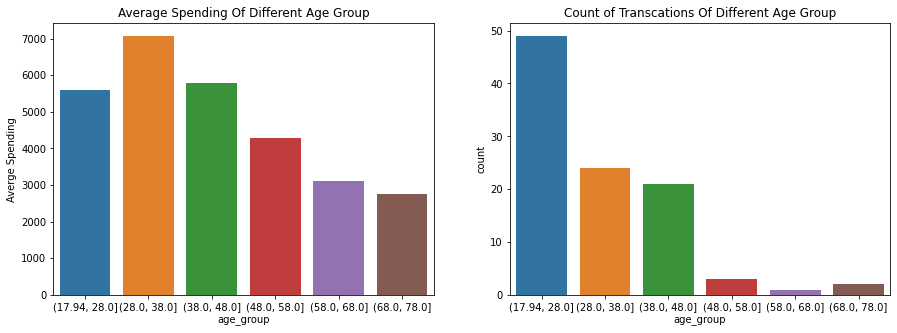

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x='age_group',y='amount',data=age_group_mean,ax=ax1)
sns.barplot(x='age_group',y='count',data=age_group_mean,ax=ax2)
ax1.title.set_text('Average Spending Of Different Age Group')
ax2.title.set_text('Count of Transcations Of Different Age Group')
ax1.set_ylabel('Averge Spending')

From from graphs above, we can see that although age group (17.94,28] has highest transcation records, but age group (28,38] purchased more expensive thinng. But depends how we bin that age group, the result might be different. I am going to further investigate the matter to discover whether there's a correlation between average spending VS. age and count of transcation records VS. age. 

In [16]:
# Plot correlation for Age Vs. Average Spending and Age Vs. Count of Transcation Records
ind_avg_spend=pd.DataFrame(spend.groupby('account')['amount'].mean()).reset_index()
ind_avg_spend=ind_avg_spend.merge(acc_age,how='left')
ind_avg_spend=ind_avg_spend.drop_duplicates().reset_index().drop('index',axis=1,errors='ignore')
ind_avg_spend

,account,amount,age
0,ACC-1037050564,31.257195,40
1,ACC-1056639002,45.394125,22
2,ACC-1199531521,82.038714,52
3,ACC-1217063613,40.238261,27
4,ACC-1222300524,36.788828,38
...,...,...,...
95,ACC-854938045,54.017222,28
96,ACC-90814749,59.040508,35
97,ACC-958000567,71.646587,34
98,ACC-964839203,56.684381,21


Text(0, 0.5, 'Average Spending')

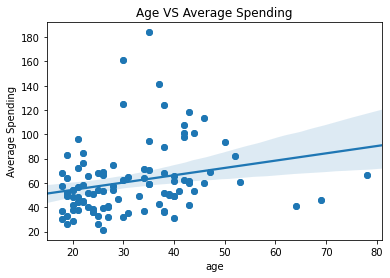

In [17]:
plt.scatter(ind_avg_spend['age'],ind_avg_spend['amount'])
sns.regplot(x=ind_avg_spend['age'],y=ind_avg_spend['amount'])
plt.title('Age VS Average Spending')
plt.ylabel('Average Spending')

In [18]:
ind_good_purchased=pd.DataFrame(spend.groupby('account')['amount'].count()).reset_index()
ind_good_purchased=ind_good_purchased.merge(acc_age,how='left')
ind_good_purchased=ind_good_purchased.drop_duplicates().reset_index().drop('index',axis=1,errors='ignore')
ind_good_purchased

,account,amount,age
0,ACC-1037050564,246,40
1,ACC-1056639002,80,22
2,ACC-1199531521,70,52
3,ACC-1217063613,23,27
4,ACC-1222300524,290,38
...,...,...,...
95,ACC-854938045,162,28
96,ACC-90814749,118,35
97,ACC-958000567,167,34
98,ACC-964839203,105,21


Text(0, 0.5, 'Transcation Count')

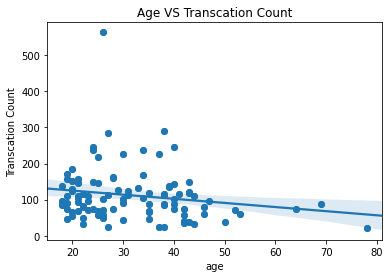

In [19]:
plt.scatter(ind_good_purchased['age'],ind_good_purchased['amount'])
sns.regplot(x=ind_good_purchased['age'],y=ind_good_purchased['amount'])
plt.title('Age VS Transcation Count')
plt.ylabel('Transcation Count')

The two graphs illustrated that as age increased, the average spending increase while the transcation records decrease.

(7.5, -0.5)

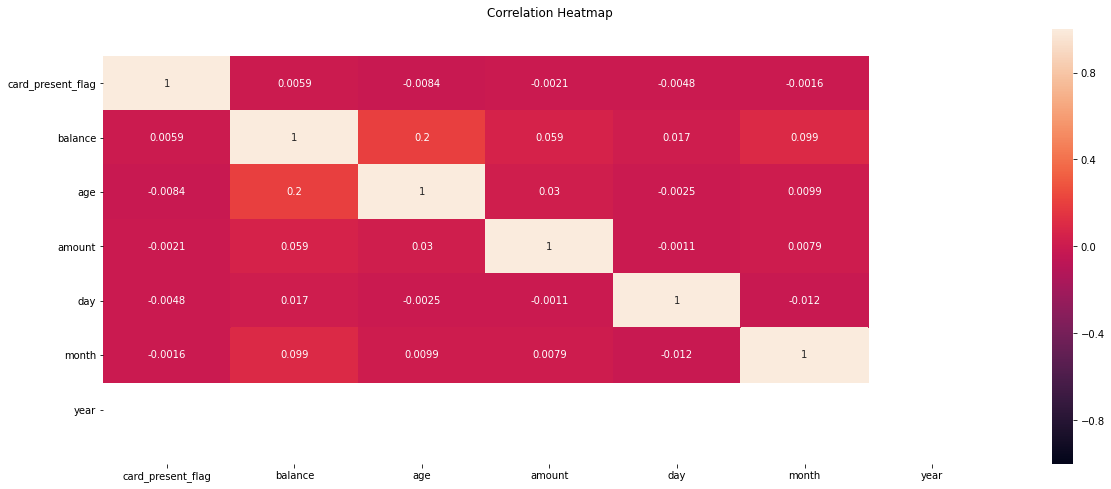

In [20]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
bottom,top=heatmap.get_ylim()
heatmap.set_ylim(bottom+0.5,top-0.5)

In [21]:
print('average transcation amount:'+str(data['amount'].mean()))

average transcation amount:187.93358797641767


Text(0.5, 1.0, 'Transcation Count for Each Month')

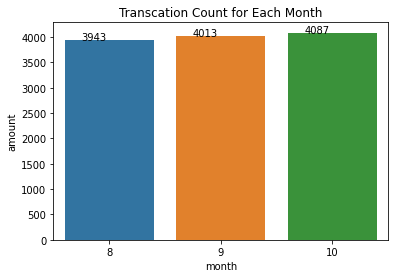

In [23]:
#Transcation Count for Each Month
month_tran_count=pd.DataFrame(data.groupby('month')['amount'].count()).reset_index()
sns.barplot(x=month_tran_count['month'],y=month_tran_count['amount'])
for i, v in enumerate(month_tran_count['amount']):
    plt.text(i - 0.25, v, str(round(v,2)))
plt.title('Transcation Count for Each Month')

Text(0.5, 1.0, 'Total Transcation Amount for Different Months')

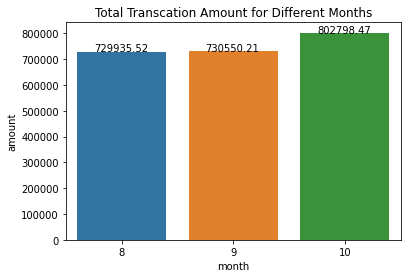

In [24]:
# Total Transcation Amount for Different Month 
month_total=data.groupby('month').sum()
sns.barplot(x=month_total.index,y=month_total['amount'])
for i, v in enumerate(month_total['amount']):
    plt.text(i - 0.25, v, str(round(v,2)))
plt.title('Total Transcation Amount for Different Months')

Text(0.5, 1.0, 'Transcation Amount in Percentage for Different Day of the Week')

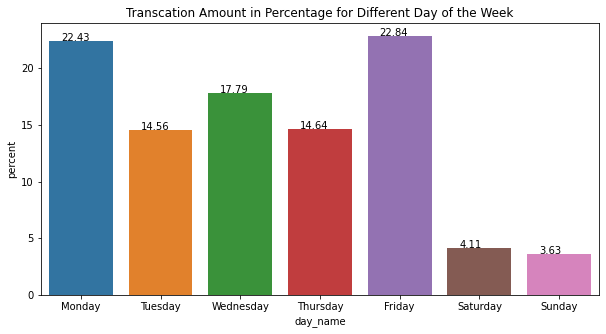

In [25]:
trans_sum=data['amount'].sum()
trans_day=data.groupby('day_name').sum().reset_index()
trans_day['percent']=round((trans_day['amount']/trans_sum)*100,2)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trans_day['day_name'] = pd.Categorical(trans_day['day_name'], categories=cats, ordered=True)
trans_day = trans_day.sort_values('day_name')
plt.figure(figsize=(10,5))
for i, v in enumerate(trans_day['percent']):
    plt.text(i - 0.25, v, str(round(v,2)))
sns.barplot(x=trans_day['day_name'],y=trans_day['percent'])
plt.title('Transcation Amount in Percentage for Different Day of the Week')

In [26]:
data['merchant_long_lat'].value_counts()

151.21 -33.87    145
144.96 -37.82     85
144.97 -37.81     59
144.96 -37.81     56
153.02 -27.47     46
                ... 
115.87 -32.01      1
153.01 -27.36      1
130.88 -12.39      1
138.65 -34.76      1
144.96 -37.75      1
Name: merchant_long_lat, Length: 2703, dtype: int64

In [27]:
data['longtitude']=data['long_lat'].apply(lambda x: x.split()[0]).astype(float)
data['latitude']=data['long_lat'].apply(lambda x: x.split()[1]).astype(float)
data['merchant_long']=data[data['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x: x.split()[0]).astype(float)
data['merchant_lat']=data[data['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x: x.split()[1]).astype(float)

In [28]:
BBox = (data['longtitude'].min(),data['longtitude'].max(),
        data['latitude'].min(),data['latitude'].max())
BBox

(114.62, 255.0, -573.0, -12.37)

In [29]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
crs = {'init':'espc:4326'}
geometry = [Point(xy) for xy in zip(data['longtitude'], data['latitude'])]
geo_df = gpd.GeoDataFrame(data,
 crs = crs,
 geometry = geometry)
geo_df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,movement,day,month,year,day_name,longtitude,latitude,merchant_long,merchant_lat,geometry
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,debit,1,8,2018,Wednesday,153.41,-27.95,153.38,-27.99,POINT (153.41000 -27.95000)
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,debit,1,8,2018,Wednesday,153.41,-27.95,151.21,-33.87,POINT (153.41000 -27.95000)
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,debit,1,8,2018,Wednesday,151.23,-33.94,151.21,-33.87,POINT (151.23000 -33.94000)
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,debit,1,8,2018,Wednesday,153.10,-27.66,153.05,-26.68,POINT (153.10000 -27.66000)
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,debit,1,8,2018,Wednesday,153.41,-27.95,153.44,-28.06,POINT (153.41000 -27.95000)


(0.0, -50.0)

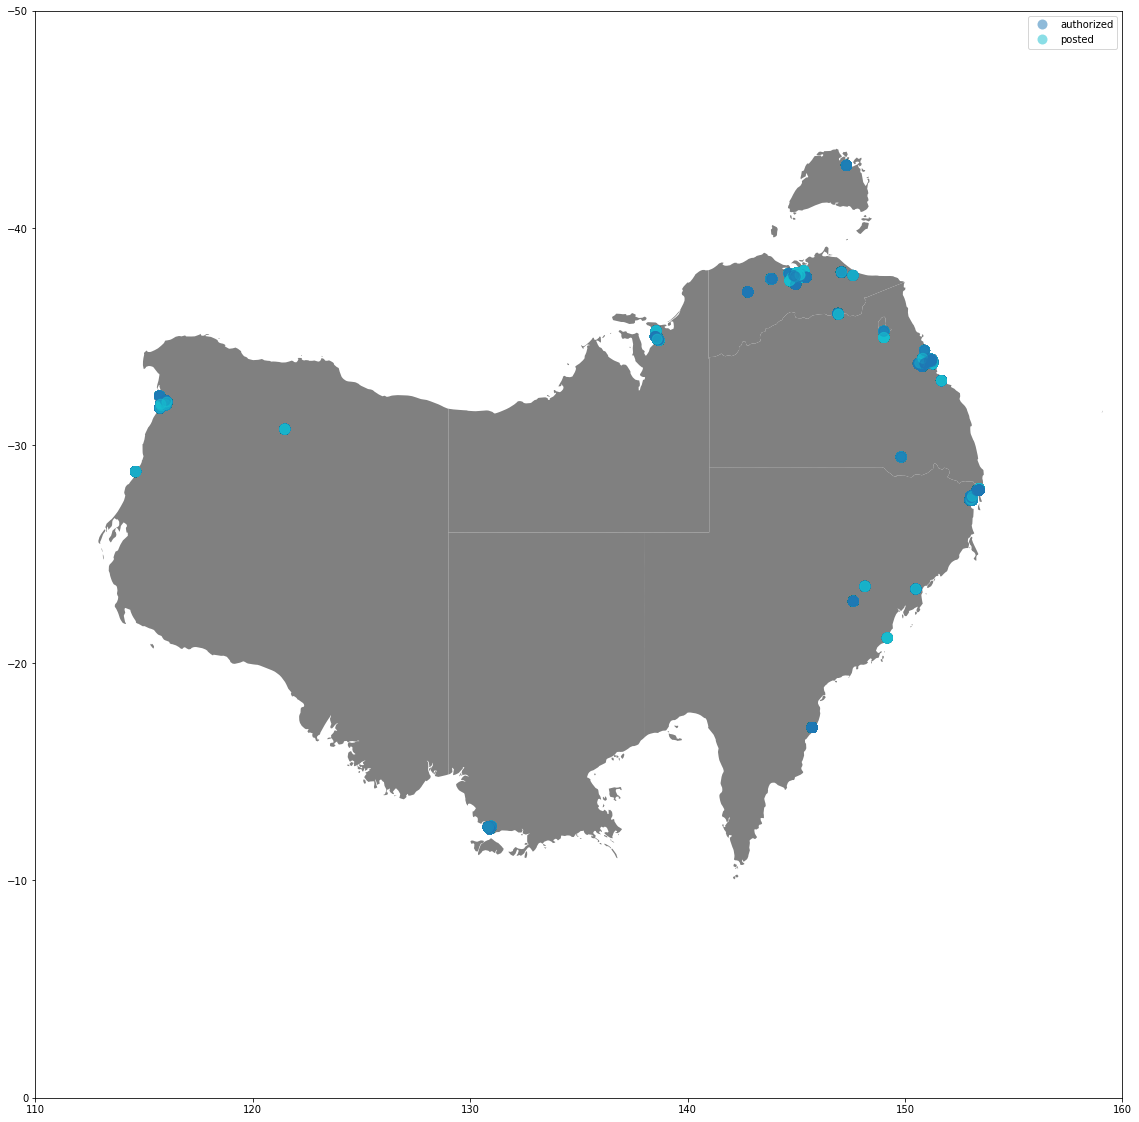

In [30]:
fig, ax = plt.subplots(figsize=(20,20))
street_map=gpd.read_file('as.shp')
street_map.plot(ax=ax, alpha=1,color='grey')
geo_df.plot(column='status',ax=ax,alpha=0.5, legend=True,markersize=100,s='amount')
plt.xlim(110,160)
plt.ylim(0,-50)

In [32]:
geo_df.to_csv('df.csv')